# Directory Structure

* BDD consists of:
    * Steps (Given, When, Then, And, But): Located in feature files (`.feature`).
    * Steps Definitions: Located in Python files (`.py`).
* Behave handles several options for directory layout or folder structure.
* A `steps` directory is required in the directory which contains the feature files.

Two examples that meet the minimum requirement are:

**Test Layout Option 1**:

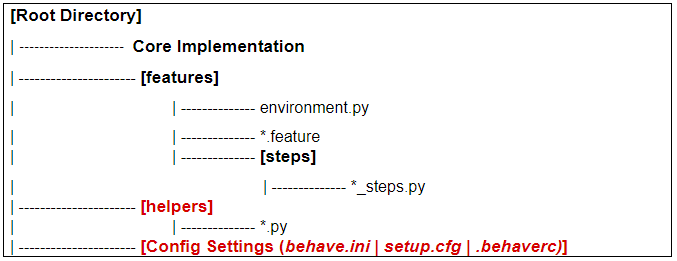


**Test Layout Option 2**:

```
[Root]

|--------------------Core Implementation

|--------------------[features]
                            |-------------- testcase1.feature
                            |-------------- testcase2.feature                          
                            |-------------- testcase3.feature
                            
|-------------------- [steps]
                            |-------------- steps.py                           
                            |-------------- more_python.py
```


# Feature File        

* **Feature**
    * Feature file has `.feature` extension.
    * A feature is equivalent to a story.
    * Starts with the `Feature:` keyword. 
    * Each feature file can have only one `Feature:` keyword.
* **Scenario/Test case**
    * Starts with the `Scenario:` keyword.
    * Can have multiple scenarios in a single feature file.
* **Steps**
* One or multiple lines with keywords: `Given`, `When`, `Then`, `And`, and `But`.
* Can have multiple steps in a single scenario.

## Examples

```gherkin
Feature: Attempt to logging in with invalid credentials


    Scenario: None existing user try to login

        Given I generate a random email address
        When I type random email
        When I type correct password
        When I click on 'Login'
        Then I should see the text 'Error: User not found'


    Scenario: User try to login with wrong password

        Given I create a user
        When I type correct email
        When I type random password
        When I click on 'Login'
        Then I should see the text 'Error: Incorrect password'


    Scenario: User try to login with no password

        Given I create a user
        When I type correct email
        When I click on 'Login'
        Then I should see the text 'Error: Password field is empty'


    Scenario: User try to login with invalid format email

        When I type invalid format email
        When I type correct password
        When I click on 'Login'
        Then I should see the text 'Error: Email is invalid format'
```

# Step Definition file

* Step definitions go under the `steps` directory.
    * The `steps` directory is required to be in the directory which contains the feature files.
    * Each step is represented as a Python function and must have any one of the decorators: `Given`, `When`, `Then`, `And`, or `But`.
* More `.py` files can exist in the `steps` folder that are not definitions. They will have logic and can get imported into the definition file.

## Example:

```python


from behave import given, when, then
import user
import assertions
import pdb

@given("I create a new user")
def create_new_user(context):
    """
    Step to create a new user.
    :return:
    """
    print("I am creating a new user")
    print(":) :) :) :) :) :)")
    print("More code would go here")
    # user.user_creator()
    prefix = context.config.userdata.get('prefix')

    pdb.set_trace()

@when("I type email")
def type_the_email(context):
    """
    Step to type email address in the email field
    :return:
    """

    print("Typing the email in the email field.")
    # email_field = driver.find_element('id', 'email')
    # email_field.send_keys('test@supersqa.com')
    print("Just finished typing the email :)")

@when("I type password")
def type_the_password(context):
    """
    Step to type email address in the password field
    :return:
    """
    print("Typing the password in the password field")
    # pass_field = driver.find_element_by_id('password')
    # pass_field.send_keys('123456')
    print("Just typed the password. :)")

@when("I click on 'Login'")
def click_login(context):
    """
    Step to click login
    :return:
    """
    print("I am clicking login!!!!")

@then("I should see the text Welcome")
def see_welcome_text(context):
    """
    Step to verify text is displayed
    :return:
    """
    assertions.assert_text_visible('Welcome')
    print("checking if 'Welcome' text is displayed")
    print("Yep it sure is there!!!")
    print("PASS!!!")

@when("I type correct email")
def type_correct_email(context):
    print("Typing correct email.")

```

# Execute behave via command-line

* Ways to run tests in **behave**:
    * One feature file at a time
    * All feature files in directory/sub-directory
    * Group of features/scenarios controlled by Tags
* Output of the test run is highly configurable.
    * By default, a passing test doesn't print to **stdout**, only failing test print the error in **stdout**.
    * To enable logging in **stdout**, use the **`--no-capture`** command line argument with **`behave`** command.
    * By default, output coloring is turned off in console/stdout.
    * To turn off output coloring, use the **`--no-color`** command line argument with **`behave`** command.
    * To turn off output coloring, use the **`--color`** command line argument with **`behave`** command.

**Assume you have following Test Layout**:

```
[Root]

|--------------------Core Implementation

|--------------------[features]
                            |-------------- testcase1.feature
                            |-------------- testcase2.feature                          
                            |-------------- testcase3.feature

                            |-------------------- [steps]
                                                    |-------------- steps.py                           
                                                    |-------------- more_python.py
```



## Run one feature file at a time

```
behave testcase1.feature

behave testcase1.feature --no-capture

behave testcase1.feature --no-capture --color
```

## Run all feature files 

* Behave is smart enough to find tests in sub-directories, as long as there is a `steps` directory one level up or in the same level.
* If there is a `steps` folder in the current directory then it will not go up to look for more definitions.

```
behave
```

# Displaying Output

* By default, Behave does not print the standard output in the console for tests that pass.
* Standards outputs are 'logging' statements or 'print; statement.
* If the test fails, all logging for the failed test will show.
* To force printing, use command lone argument `--no-capture`.

```
bheave --no-capture
```

> Note: use `behave --help` for more command line options

# `Given`, `When`, `Then`, `And`, or `But`

**`Given`**
- used for pre-condition
- setup actions
- no interaction

**`When`**
- interaction with application
- act on something

**`Then`**
- verification
- expectation

**`And` & `But`**
- represent the preceding keyword `Given`, `When` & `Then`.
- just a syntactic sugar for better semantics, expression, and easier readablity.


**Example: Without `And` & `But` keyword**

```gherkin
Feature: Taxes

Scenario: Tax should be calculated

Given I am a new user
Given I have a credit card
Given I am logged in
When I search for a headphone
When I add a headphone to my cart
Then the tax should be calculated
Then the subtotal should be correct
Then the total should be correct
```

**Example: With `And` & `But` keyword**

```gherkin
Feature: Taxes

Scenario: Tax should be calculated for logged in user

Given I am a new user
And I have a credit card
And I am logged in
When I search for a headphone
And I add a headphone to my cart
Then the tax should be calculated
And the subtotal should be correct
Then the total should be correct
```

```gherkin
Feature: Taxes

Scenario: Tax should be calculated user not logged in

Given I am a new user
And I have a credit card
But I am not logged in
When I search for a headphone
And I add a headphone to my cart
Then the tax should be calculated
And the subtotal should be correct
And the total should be correct
But the order should not get placed
```